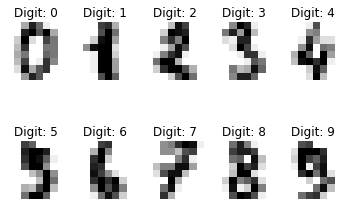

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 손으로 쓴 숫자 데이터 읽기
digits=datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [20]:
# 3과 8의 데이터 위치를 구하기
flag_3_8=(digits.target == 3) + (digits.target == 8)

# 3과 8 이미지와 레이블을 구해서 변수에 저장
images = digits.images[flag_3_8]
# 357개 , 8행 8열 2차원 

labels = digits.target[flag_3_8]

# 3과 8이 이미지 데이터를 2차원에서 1차원으로 변환
images = images.reshape(images.shape[0], -1)    # -1은 가변적

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, 
                                                    labels, 
                                                    test_size=0.3, 
                                                    random_state=10)
# x_train     # 훈련 이미지
# x_test      # 테스트 이미지
# y_train     # 훈련 라벨
# y_test      # 테스트 이미지

In [21]:
# 결정 트리 분류기 모델 생성
from sklearn import svm

# 모델 생성 
# SVC(Support Vector Classifier)
# C는 패널티 파라미터로 어느 정도 오류 분류를 허용하는지 나타낸다.
# 알고리즘에 사용될 커널 유형을 지정. 'linear', 'poly', 'rbf‘(기본값), 'sigmoid', 'precomputed
classifier = svm.SVC(kernel = 'rbf')

# 모델 학습
classifier.fit(x_train, y_train)

from sklearn import metrics

predict_label = classifier.predict(x_test)# 예측 라벨값

print('정답률(Accuracy):', metrics.accuracy_score(y_test, predict_label))
print('혼돈행렬(Confusion matrix): \n', metrics.confusion_matrix(y_test, predict_label))
# pos_label=3 -> 3 라벨의 적합률이 잘나온지
print('3라벨 적합률(Presision):', metrics.precision_score(y_test, predict_label, pos_label=3))   
print('8라벨 적합률(Presision):', metrics.precision_score(y_test, predict_label, pos_label=8))
print('3라벨 재현율(Recall):', metrics.recall_score(y_test, predict_label, pos_label=3))
print('8라벨 재현율(Recall):', metrics.recall_score(y_test, predict_label, pos_label=8))
print('3라벨 F값(F-measure):', metrics.f1_score(y_test, predict_label, pos_label=3))
print('8라벨 F값(F-measure):', metrics.f1_score(y_test, predict_label, pos_label=8))

정답률(Accuracy): 0.5740740740740741
혼돈행렬(Confusion matrix): 
 [[55  0]
 [46  7]]
3라벨 적합률(Presision): 0.5445544554455446
8라벨 적합률(Presision): 1.0
3라벨 재현율(Recall): 1.0
8라벨 재현율(Recall): 0.1320754716981132
3라벨 F값(F-measure): 0.7051282051282052
8라벨 F값(F-measure): 0.23333333333333334
